In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [4]:
telco_base_data = pd.read_excel("telcom_customer_churn.xlsx")
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Observing our data attributes

In [5]:
telco_base_data.shape

(7043, 21)

In [7]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
#Checking the Data types
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Statistically viewing our data

In [10]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 -- From this information we can conculde that 75% customers have tenure less than 75%
 
 -- 75% of the customers pay more than $ 89.85 per month.

### Visualising our Target Varibale

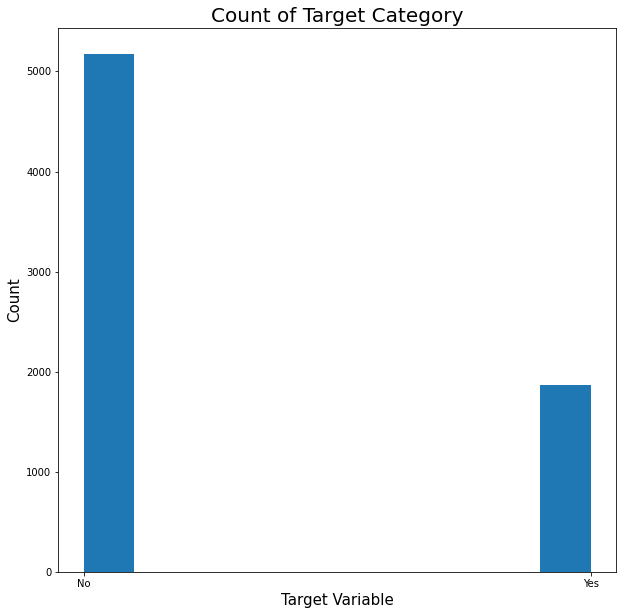

In [18]:
plt.figure(figsize=(10,10))

plt.hist(telco_base_data['Churn'])
plt.title("Count of Target Category",fontsize=20)
plt.xlabel("Target Variable", fontsize =15)
plt.ylabel("Count", fontsize=15)
plt.show()

### Calculating the Percentage

In [19]:
100 * telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [21]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### From the above numbers we can see that the data is highly imbalanced wiht a ratio of 74:26
### Differences in Majority and Minority Classes

### Let's look at our other Independent Variables and get their summary.

In [25]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Looking for Null Values

In [32]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
missing_values = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()

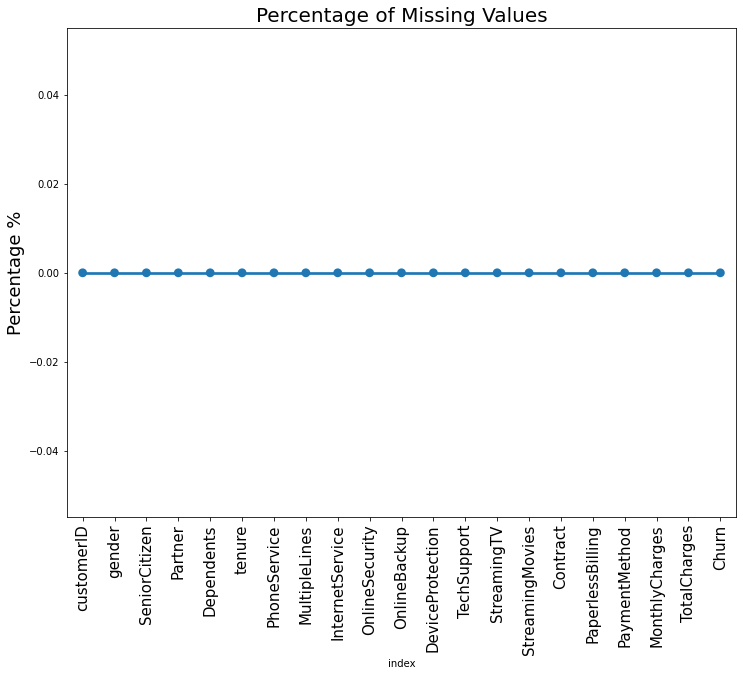

In [39]:
plt.figure(figsize=(12,9))
ax =sns.pointplot('index',0,data=missing_values)
plt.xticks(rotation=90, fontsize=15)
plt.title("Percentage of Missing Values", fontsize =20)
plt.ylabel("Percentage %",fontsize =18)
plt.show()

#### The point plot in seaborn means a scatter plot depicting point estimations for categories. 

-- With this we can see that there no missing values as such. 

-- It's a good rule to check for Null Values, and if there are any Null Values there are different ways to handle null values.

  -- Imputing them with different strategies like Mean, Median, Mode, KNN and more.

### Let's clean our Data so it can be better used in our Model

In [42]:
#creating a copy of base data for manipulation and processing.
telco_data = telco_base_data.copy()

#### Changing our data type of the TotalCharges from Object to numeric as are the Values

In [50]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors ='coerce')
telco_data.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

-- There are 11 missing values present in TotalCharges. Let's have a look at them.

In [52]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]
#This gives us all the row values that have Null in them for the Total Charges Column.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### These missing values dont add much value to our data so we will drop them.

In [53]:
telco_data.dropna(how ='any', inplace=True)

In [55]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. 

### This where we will bin our data with Pandas Cut into a Group of 12 months of Tenure.

In [60]:
telco_data['tenure'].max()

72

In [66]:
# grouping the tenure bins
labels = ["{0} - {1}".format(i,i + 11) for i in range(1,73,12)]
telco_data['Tenure_group'] = pd.cut(telco_data['tenure'], range(1,80,12), right =False, labels=labels)

In [67]:
telco_data['Tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_group, dtype: int64

### Dropping unnecessary columns from the dataset

In [68]:
telco_data.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration
1. Plotting Distribution of Individual predictors by churn

### We make some Univariate Analyis here on a single variabel of the data

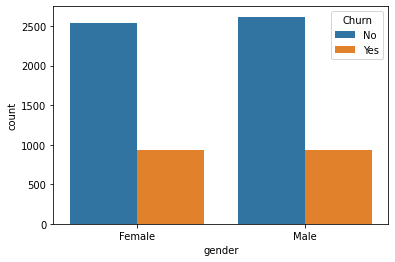

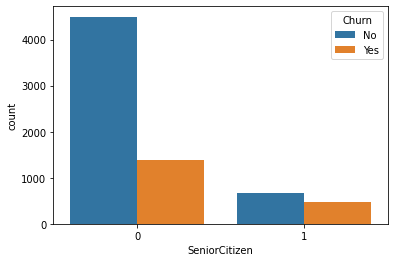

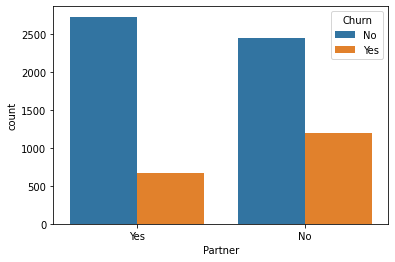

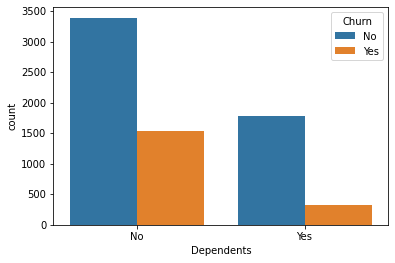

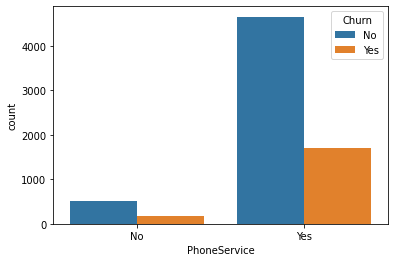

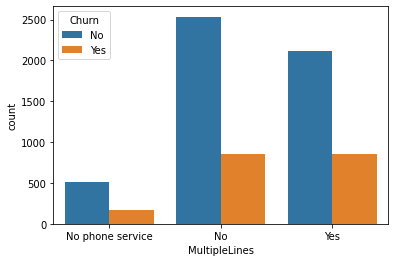

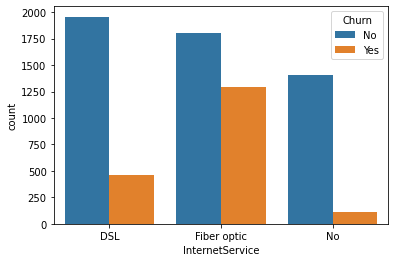

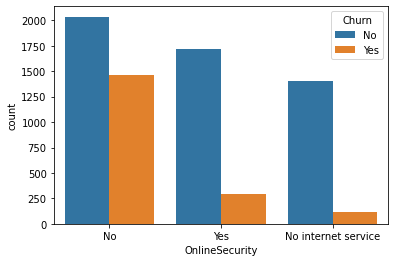

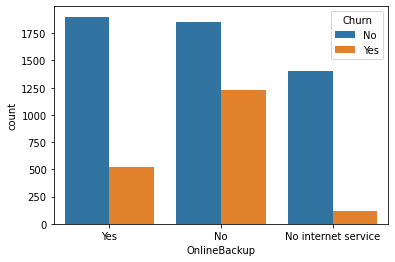

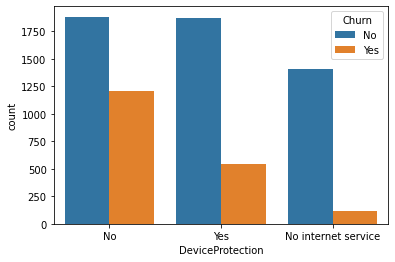

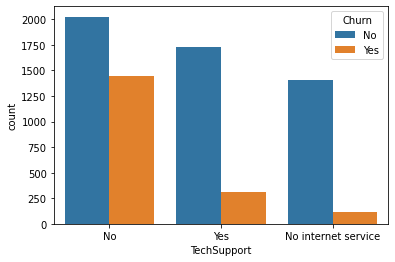

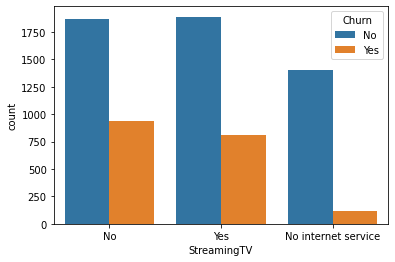

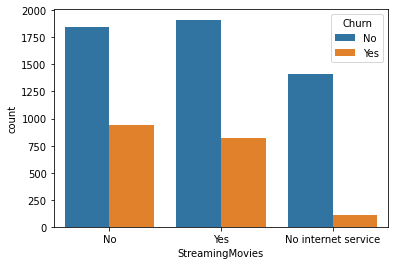

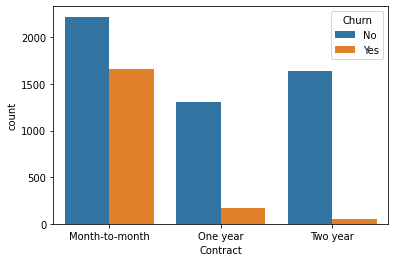

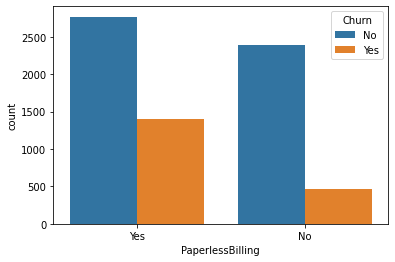

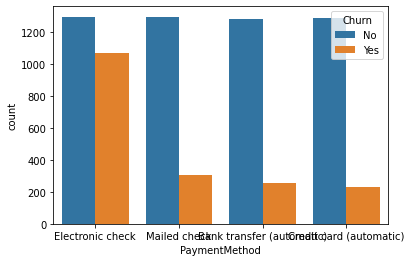

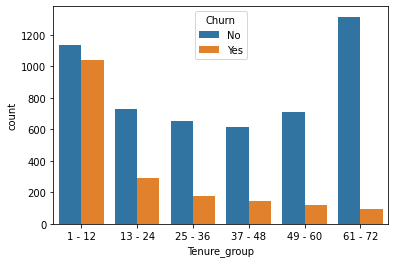

In [79]:
for index, variable in enumerate(telco_data.drop(columns=['Churn',"TotalCharges","MonthlyCharges"])):
    plt.figure()
    sns.countplot(data=telco_data, x=variable, hue="Churn")

### Converting our Target Variable "CHURN" into a categorical variable.

In [80]:
telco_data['Churn'].replace(to_replace=["Yes","No"], value=[1,0], inplace= True)
# yes - , no -0

In [81]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### Convert all Categorical variables into Dummy variable 

In [82]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Relationship between Monthyl Charges and Total Charges.

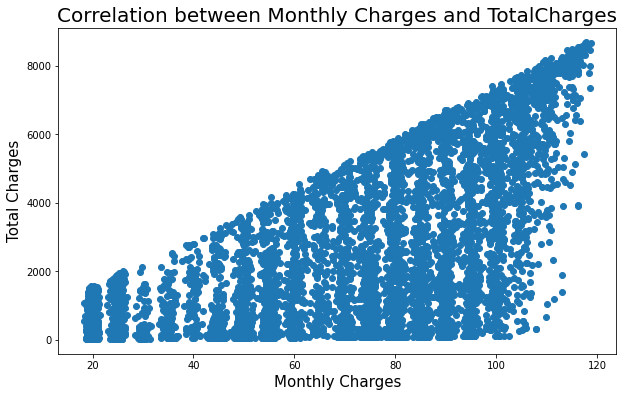

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(telco_data_dummies['MonthlyCharges'],telco_data_dummies['TotalCharges'])
plt.xlabel("Monthly Charges", fontsize=15)
plt.ylabel("Total Charges", fontsize=15)
plt.title("Correlation between Monthly Charges and TotalCharges", fontsize=20)
plt.show()

#### There is a positive correlation as expected!

### What cause the CHURN RATE the most? Monthyl charges or Total Charges?
### Let's have a look at the plot to understand it better.

Text(0.5, 1.0, 'Monthly Charges by Churn')

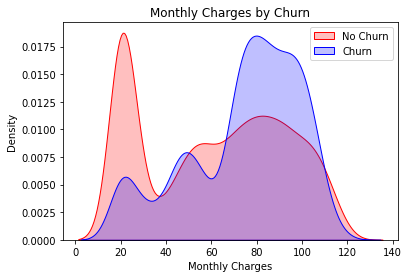

In [96]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==0)],
                                                            color= "Red", shade= True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==1)],
                                                           color= "Blue", shade= True)
Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title("Monthly Charges by Churn")

### We can identify that the Churn is higher in when Monthly Charges are up.

Text(0.5, 1.0, 'Total Charges by Churn')

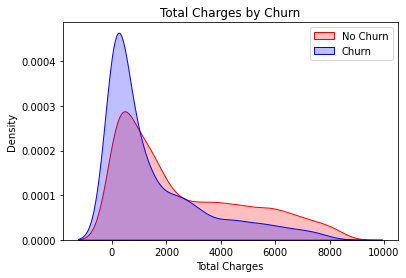

In [98]:
Mth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"]==0)],
                                                            color= "Red", shade= True)
Mth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"]==1)],
                                                           color= "Blue", shade= True)
Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Total Charges")
Mth.set_title("Total Charges by Churn")

### It is surpirsing to see that the churn is higher at Total charges when the charges are less as per the Plot.

### However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

####  

### Let's look at the Correlation Matrix amongst the features.

<AxesSubplot:>

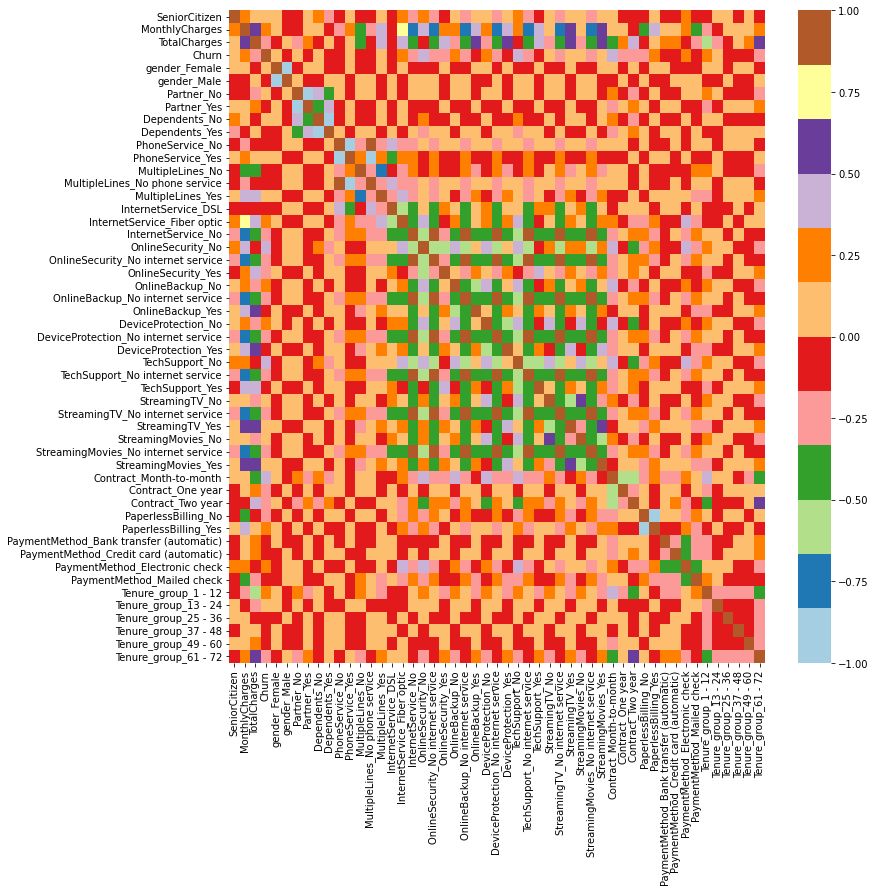

In [108]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

#### Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

#  

### Let's do some Bivariate Analysis

In [109]:
new_df1_target0 =telco_data.loc[telco_data['Churn']==0]
new_df1_target1 = telco_data.loc[telco_data['Churn']==1]

In [110]:
def uniplot(df, col, title, hue=None):
    
    sns.set_style("whitegrid")
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

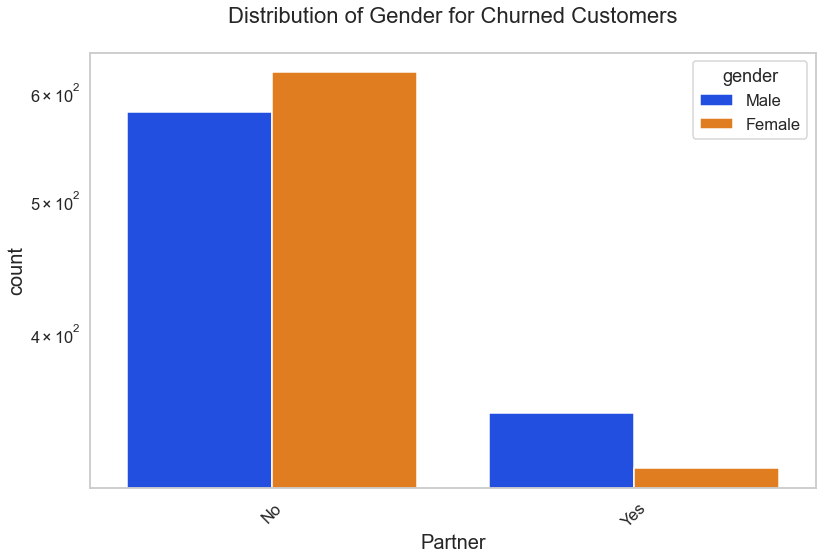

In [111]:
uniplot(new_df1_target1, col="Partner", title="Distribution of Gender for Churned Customers", hue = "gender")

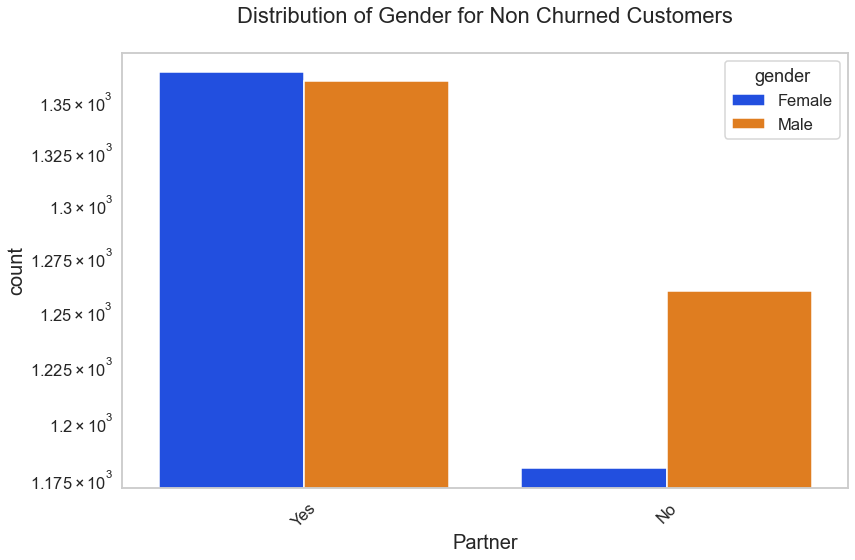

In [112]:
uniplot(new_df1_target0, col ="Partner", title ="Distribution of Gender for Non Churned Customers", hue="gender")

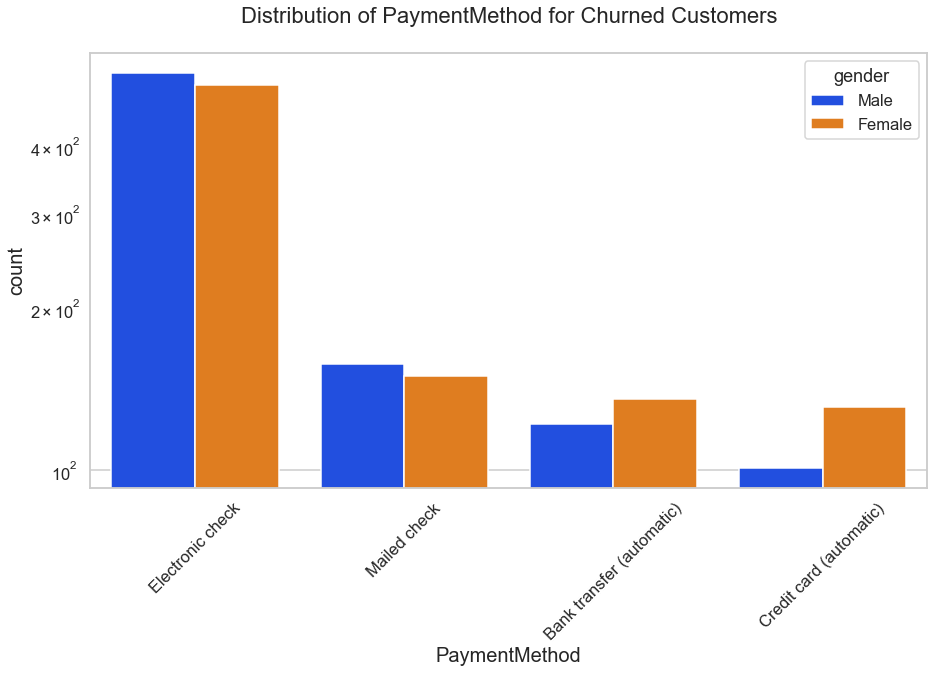

In [113]:
uniplot(new_df1_target1, col="PaymentMethod", title="Distribution of PaymentMethod for Churned Customers",hue="gender")

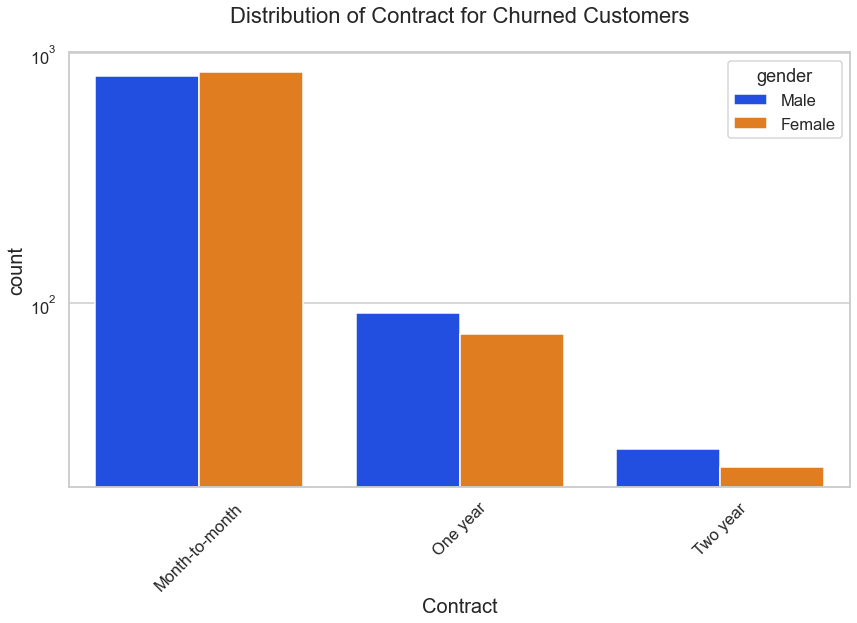

In [114]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

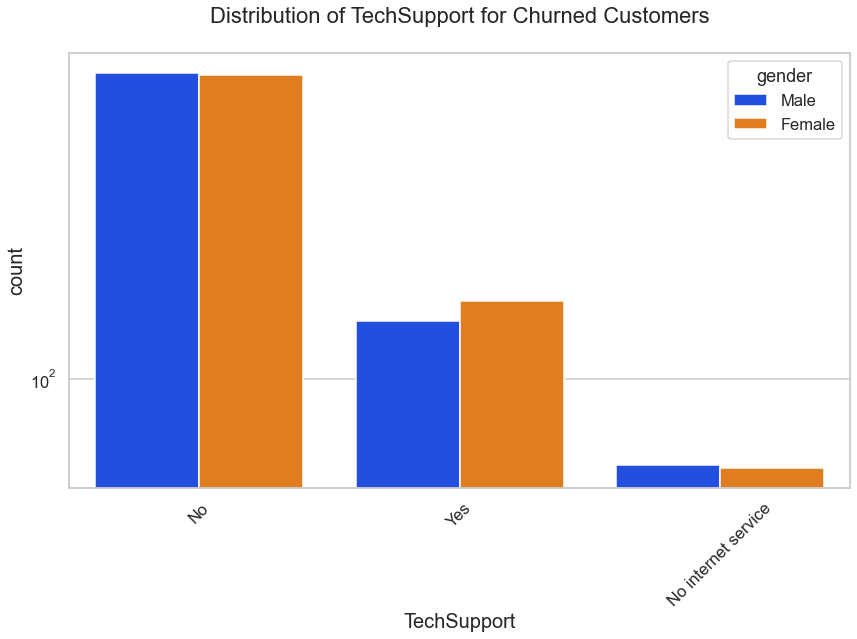

In [115]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

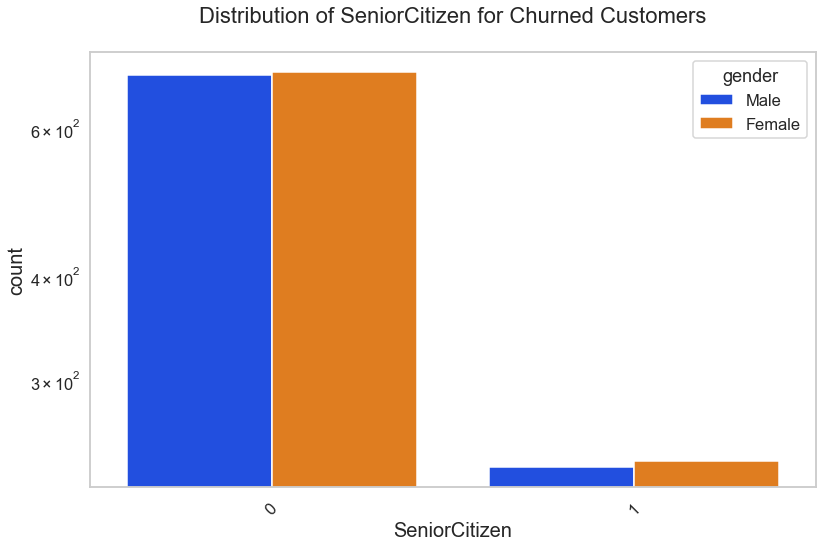

In [116]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

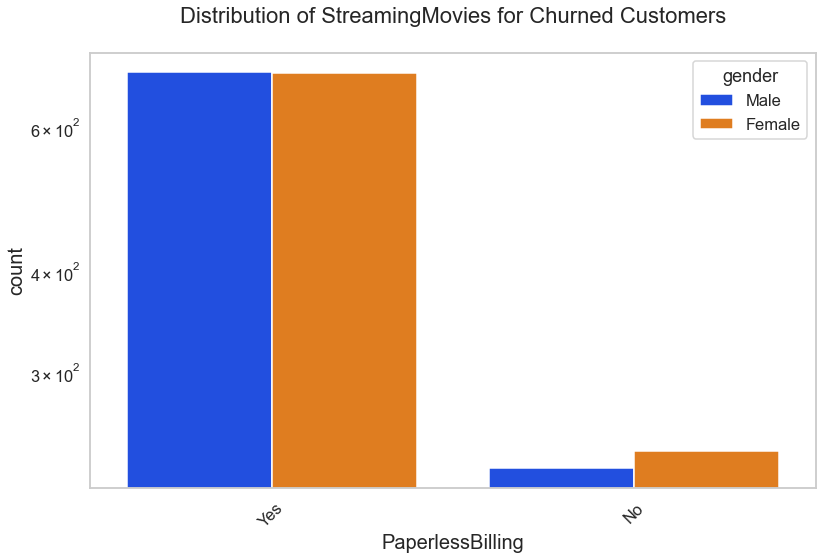

In [120]:
uniplot(new_df1_target1,col='PaperlessBilling',title='Distribution of StreamingMovies for Churned Customers',hue='gender')

### TO CONCLUDE THIS EDA WE CAN SAY THAT

-- Payment via Electronic Check has the highest churn amongst other categories.

-- Month-to-Month churn rate is higher as the customers are not in contract with the company for a period of time.

-- Zero Online security support leads to high rate in churn rate.

-- Non Senior citizens are high churners.
